In [7]:
# requirements: numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 준비 ─ 임베딩 차원 d = 2
np.random.seed(0)
d = 2
N_similar = 1000            # B와 비슷한 토큰 수

emb_list = [
    np.array([1.0, 0.0]),   # A  (idx 0)
    np.array([2.0, 0.0]),   # B  (idx 1)
    np.array([0.0, 1.0]),   # C  (idx 2)
    np.array([1.9, 0.2])    # D  (idx 3) → Query
]

# B를 살짝 흐트러뜨린 1000개
noise = np.random.randn(N_similar, d) * 0.05
#print(noise)
b_clones = np.tile(np.array([2.0, 0.0]), (N_similar, 1)) + noise
print(b_clones)  # (1000, 2)
emb_list.extend(b_clones)

X = np.stack(emb_list)      # (1050, 2)

# 2) Self-Attention (W_Q = W_K = W_V = I, single head)
scores = (X @ X.T) / np.sqrt(d)   # 점곱 후 √d로 나눔
s_D = scores[3]                   # D 행만
alpha = np.exp(s_D)
alpha /= alpha.sum()              # softmax 정규화
z_D = (alpha[:, None] * X).sum(axis=0)


[[ 2.08820262  0.02000786]
 [ 2.0489369   0.11204466]
 [ 2.0933779  -0.04886389]
 ...
 [ 2.00989141  0.00488754]
 [ 2.07007617  0.00792169]
 [ 1.94290493 -0.06554852]]


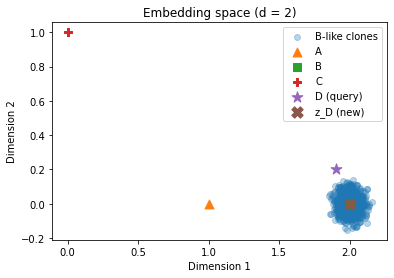

In [3]:
# 3-A) 임베딩 산점도
plt.figure()
plt.scatter(X[4:, 0], X[4:, 1], alpha=0.3, label="B-like clones")   # 1 000 개
plt.scatter(*X[0], marker="^", s=80, label="A")
plt.scatter(*X[1], marker="s", s=80, label="B")
plt.scatter(*X[2], marker="P", s=80, label="C")
plt.scatter(*X[3], marker="*", s=130, label="D (query)")
plt.scatter(*z_D, marker="X", s=130, label="z_D (new)")
plt.title("Embedding space (d = 2)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(loc="best")

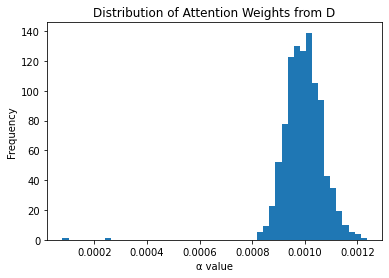

self (D) α        : 0.0009
original B α      : 0.0010
mean B-clone α    : 0.0010
softmax sum check : 1.0000
new vector z_D    : [2.00159179e+00 5.75490222e-05]


In [4]:
# 3-B) α 분포 히스토그램
plt.figure()
plt.hist(alpha, bins=50)
plt.title("Distribution of Attention Weights from D")
plt.xlabel("α value")
plt.ylabel("Frequency")

plt.show()

# 확인용 숫자 몇 가지
print(f"self (D) α        : {alpha[3]:.4f}")
print(f"original B α      : {alpha[1]:.4f}")
print(f"mean B-clone α    : {alpha[4:].mean():.4f}")
print(f"softmax sum check : {alpha.sum():.4f}")
print(f"new vector z_D    : {z_D}")